# EDA

### Análisis Exploratorio de Datos

In [2]:
# Importo las librerías a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [3]:
# Descargo el archivo de datos 
internet_prov = pd.read_parquet(r'Data\internet_prov.parquet', engine='auto')
internet_ingresos = pd.read_parquet(r'Data\ingresos.parquet', engine='auto')

## ANÁLISIS DATAFRAME: internet_prov

#### INSPECCIÓN INICIAL

In [4]:
internet_prov.head(3) # Observo las primeras filas del dataframe

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otras tecnologías,Total por tecnologia,HASTA 512 kbps,...,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Otras velocidades,Total por velocidades,Mbps (Media de bajada),Accesos por cada 100 hab,Accesos por cada 100 hogares
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0,26002.0,...,221185.0,233225.0,241778.0,106418.0,4068292.0,125147.0,5044557.0,159.13,27.80,81.10
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0,516.0,...,29753.0,51415.0,37369.0,5957.0,1374283.0,0.0,1504711.0,229.94,48.78,119.53
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0,71.0,...,2872.0,3424.0,4204.0,1822.0,62294.0,70.0,74933.0,91.45,17.50,68.82


In [5]:
# Información descriptiva del dataset
internet_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           984 non-null    int64  
 1   Trimestre                     984 non-null    int64  
 2   Provincia                     984 non-null    object 
 3   ADSL                          984 non-null    float64
 4   Cablemodem                    984 non-null    float64
 5   Fibra óptica                  984 non-null    float64
 6   Wireless                      984 non-null    float64
 7   Otras tecnologías             984 non-null    float64
 8   Total por tecnologia          984 non-null    float64
 9   HASTA 512 kbps                984 non-null    float64
 10  + 512 Kbps - 1 Mbps           984 non-null    float64
 11  + 1 Mbps - 6 Mbps             984 non-null    float64
 12  + 6 Mbps - 10 Mbps            984 non-null    float64
 13  + 10 

Dispongo  21 variables seleccionadas con 984 valores cada una sin valores nulos.

Tipos de variables:
- **Cuantitativas** (numéricas): - Discretas: 'Trimestre', 'Año' (int64)
                                - Continuas: Todas las de tipo float
- **Cualitativa**: (categórica): La columna 'Provincia'


In [6]:
# Estadísticas descriptivas de los tipos de tecnologías de conexión
col_tecnologias = ['ADSL','Cablemodem','Fibra óptica','Wireless','Otras tecnologías']
internet_prov[col_tecnologias].describe()

,ADSL,Cablemodem,Fibra óptica,Wireless,Otras tecnologías
count,9.840000e+02,9.840000e+02,9.840000e+02,984.000000,984.000000
mean,1.150317e+05,1.832892e+05,4.728246e+04,12385.282520,6556.766260
std,2.385989e+05,4.500403e+05,1.762796e+05,20996.226278,11567.922012
min,2.827000e+03,0.000000e+00,0.000000e+00,0.000000,2.000000
25%,2.076400e+04,1.085600e+04,3.540000e+02,734.000000,332.000000
50%,4.452300e+04,4.014950e+04,2.581000e+03,5105.500000,1901.000000
75%,9.148125e+04,7.582350e+04,2.554050e+04,14034.750000,7546.500000
max,1.586343e+06,2.797700e+06,1.799013e+06,150290.000000,101294.000000


A modo general, se nota una gran variabilidad de datos y su distribución, asi como también una gran desviación estándar, lo que puede indicar que hay zonas con diferencias significativas en cuanto a la penetracion y posibilidad de acceso a las tecnologías analizadas.




In [8]:
# Evalúo estadísticas descriptivas de las velocidades de conexión
col_velocidades = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'Otras velocidades']
internet_prov[col_velocidades].describe()

,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Otras velocidades
count,984.000000,984.000000,9.840000e+02,984.000000,984.000000,984.000000,9.840000e+02,984.000000
mean,1967.099593,9134.977642,1.347227e+05,38149.252033,37076.536585,20064.129065,1.157046e+05,6229.712398
std,12757.059460,20796.531611,3.245957e+05,64289.080670,88748.124134,69777.001896,4.502564e+05,14885.990695
min,6.000000,0.000000,1.336000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.000000
25%,41.000000,384.750000,2.417200e+04,3662.500000,2336.250000,40.000000,1.175000e+01,0.000000
50%,107.000000,2217.500000,4.285500e+04,13040.500000,10115.500000,1559.820000,3.272500e+03,114.500000
75%,467.250000,6946.750000,8.389625e+04,41836.750000,26436.000000,9996.250000,3.894525e+04,6507.750000
max,238920.000000,171244.480000,2.299705e+06,403575.000000,886678.000000,949093.000000,4.068292e+06,125147.000000




Al igual que con los tipos de tecnologías de conexión, todas las categorías de velocidad muestran una gran variabilidad, indicando una distribución desigual del acceso a diferentes velocidades de internet.
Las velocidades más bajas tienen una media baja y una alta dispersión, sugiriendo que hay áreas con muy baja velocidad de internet que podrían ser prioritarias para mejoras, y en cuanto a las velocidades más altas; tienen una media alta pero también una gran dispersión, indicando que aunque hay áreas con muy buen acceso, muchas otras aún no tienen acceso a estas velocidades.

In [9]:
# Evalúo estadísticas descriptivas de la penetración del intenet (medido en conexiones) por habitantes y hogares
col_penetracion_social = ['Accesos por cada 100 hab', 'Accesos por cada 100 hogares']
internet_prov[col_penetracion_social].describe()

,Accesos por cada 100 hab,Accesos por cada 100 hogares
count,984.000000,984.000000
mean,15.537902,52.159491
std,9.205334,24.036101
min,2.684669,9.347208
25%,8.909018,33.204632
50%,13.571293,49.435000
75%,19.972549,65.706626
max,52.236739,124.061394


Tanto los accesos por cada 100 habitantes como por cada 100 hogares muestran una gran variabilidad, indicando grandes desigualdades en la penetración de internet entre diferentes regiones del país.

In [10]:
# Evalúo estadísticas descriptivas de la media de bajada
media_bajada = ['Mbps (Media de bajada)']
internet_prov[media_bajada].describe()

,Mbps (Media de bajada)
count,984.000000
mean,23.186898
std,31.623977
min,2.573729
25%,4.762379
50%,9.307228
75%,27.636730
max,234.440000


La alta desviación estándar y la alta diferencia entre el mínimo y el máximo pueden indicar una gran desigualdad en las velocidades de descarga entre diferentes regiones.
La distribucion de los cuartiles indican una gran desigualdad en cuanto a infraestructura y desarrollo segun las areas, probabemente privilegiando a zonar urbanas con velocidades de descargas mas altas, por sobre otras.


#### CALIDAD DE LOS DATOS

In [11]:
internet_prov.isnull().sum() # Consulto si existen valores faltantes.

Año                             0
Trimestre                       0
Provincia                       0
ADSL                            0
Cablemodem                      0
Fibra óptica                    0
Wireless                        0
Otras tecnologías               0
Total por tecnologia            0
HASTA 512 kbps                  0
+ 512 Kbps - 1 Mbps             0
+ 1 Mbps - 6 Mbps               0
+ 6 Mbps - 10 Mbps              0
+ 10 Mbps - 20 Mbps             0
+ 20 Mbps - 30 Mbps             0
+ 30 Mbps                       0
Otras velocidades               0
Total por velocidades           0
Mbps (Media de bajada)          0
Accesos por cada 100 hab        0
Accesos por cada 100 hogares    0
dtype: int64

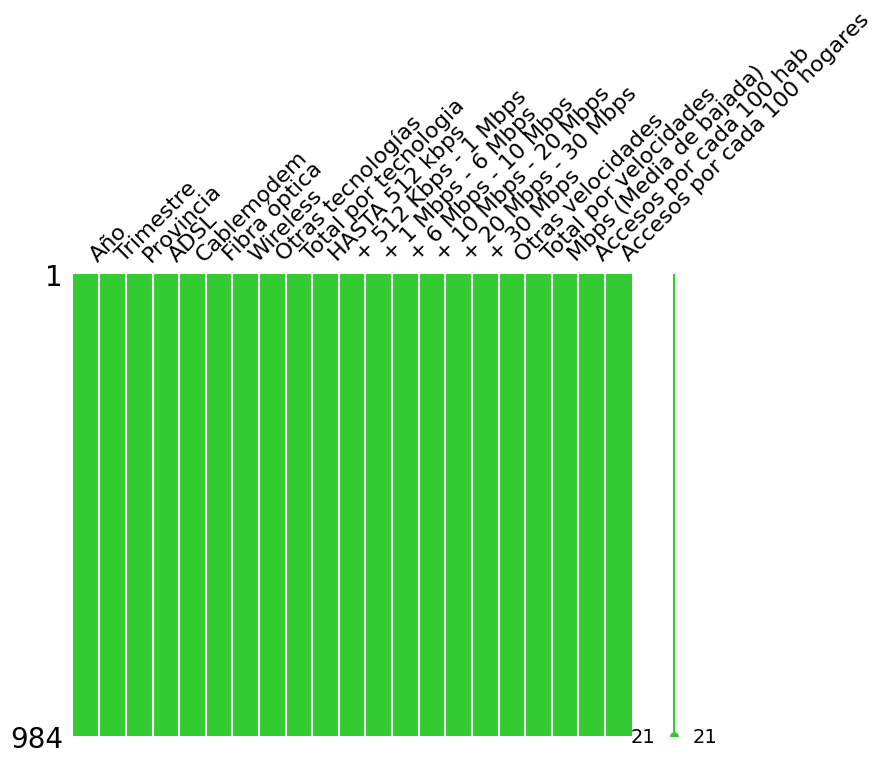

In [12]:
# Visualizo que no existen valores faltantes
msno.matrix(internet_prov, color=(0.2, 0.8, 0.2), figsize=(8, 6))
plt.show()

In [13]:
internet_prov.duplicated().sum() # Verifico no existan valores duplicados

np.int64(0)

#### ANÁLISIS UNIVARIANTE

##### Variable categórica:

In [14]:
internet_prov['Provincia'].describe()

count              984
unique              24
top       Buenos Aires
freq                41
Name: Provincia, dtype: object

##### Variables numéricas:

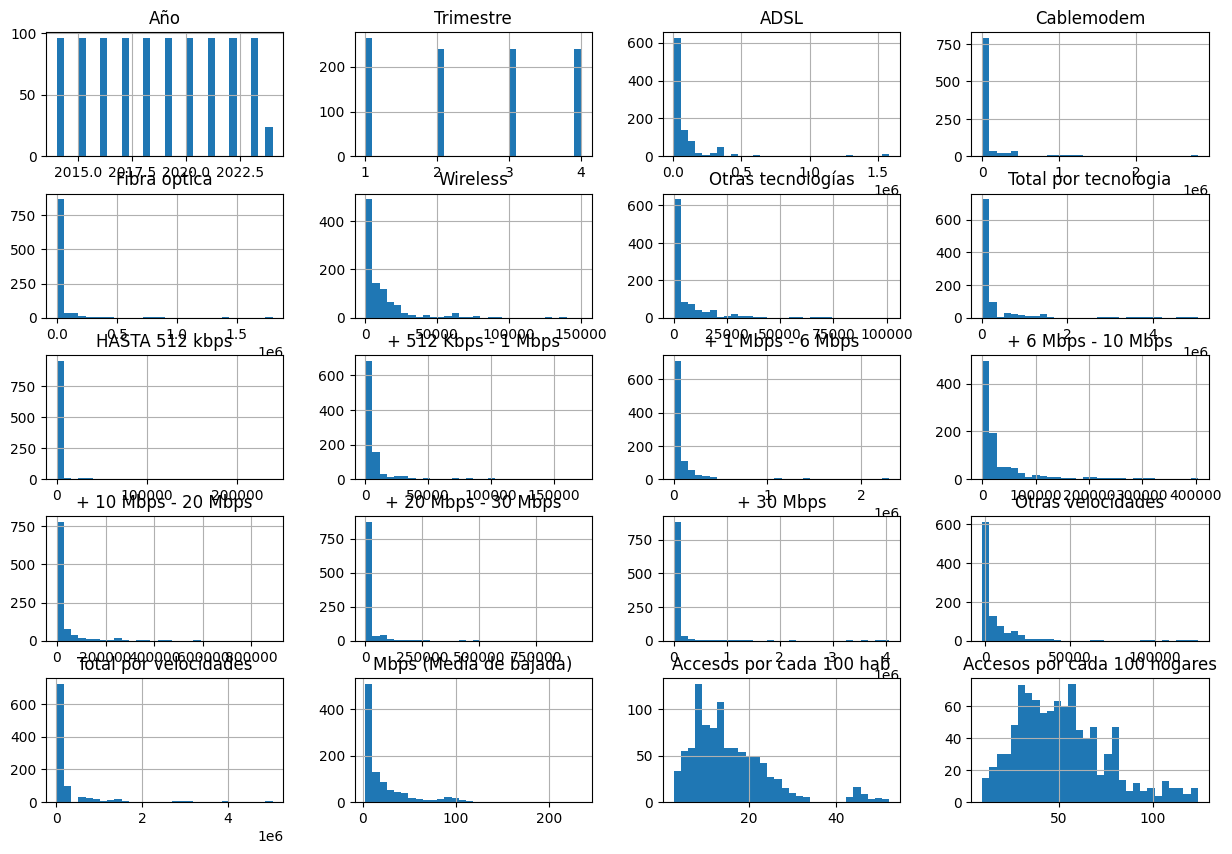

In [15]:
# Histograma de cada variable
internet_prov.hist(bins=30, figsize=(15, 10))
plt.show()

La distribución de los datos a lo largo de los años y trimestres son uniformes, indicando que los datos se han recopilado de forma constante.

La variabilidad en las distribuciones sugiere que hay una desigualdad significativa en la adopción de diferentes tecnologías de acceso a internet entre las regiones.

#### ANÁLISIS BIVARIANTE

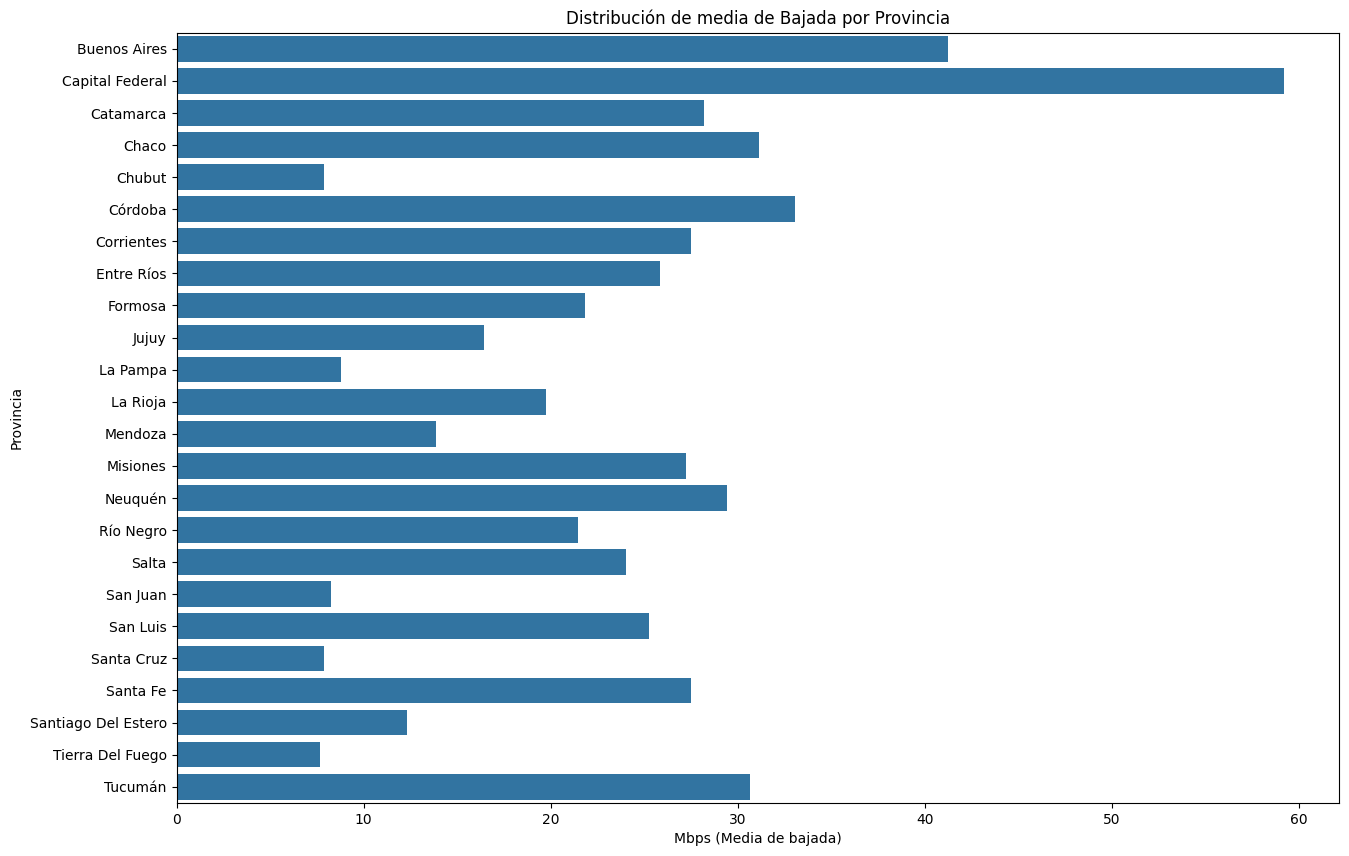

In [16]:
# Barplot para cada provincia, según su media de bajada
plt.figure(figsize=(15, 10))
sns.barplot(x='Mbps (Media de bajada)', y='Provincia', data=internet_prov, errorbar=None)
plt.title('Distribución de media de Bajada por Provincia')
plt.show()

Hay una clara desigualdad en la velocidad de internet entre las provincias. Las provincias más desarrolladas y urbanizadas tienden a tener mejores velocidades de internet.


<Figure size 1000x600 with 0 Axes>

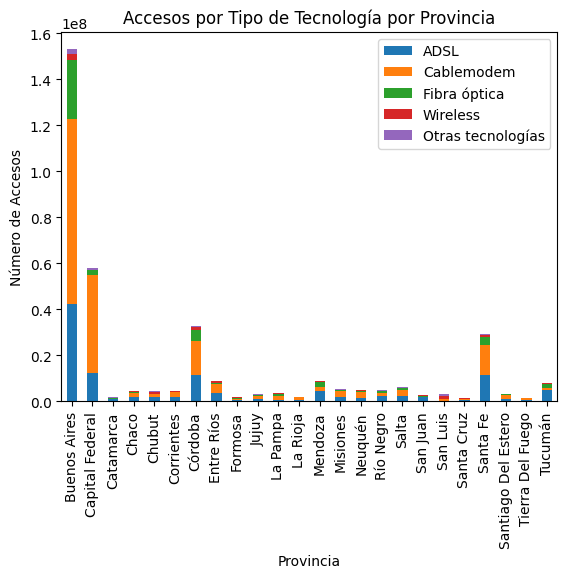

In [17]:
# Accesos por tipo de tecnología por provincia
df_aggregated = internet_prov.groupby('Provincia')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otras tecnologías']].sum().reset_index()

plt.figure(figsize=(10, 6))
df_aggregated.set_index('Provincia').plot(kind='bar', stacked=True)
plt.title('Accesos por Tipo de Tecnología por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Número de Accesos')
plt.show()

En las provincias con mayor número de accesos, la Fibra óptica y el Cablemodem son las tecnologías predominantes, lo que sugiere una mejor infraestructura y mayor inversión en estas áreas.
En provincias con menos accesos, hay una mayor dependencia de tecnologías más lentas como ADSL y Wireless, lo que podría indicar una brecha digital en términos de velocidad y calidad de acceso a internet.

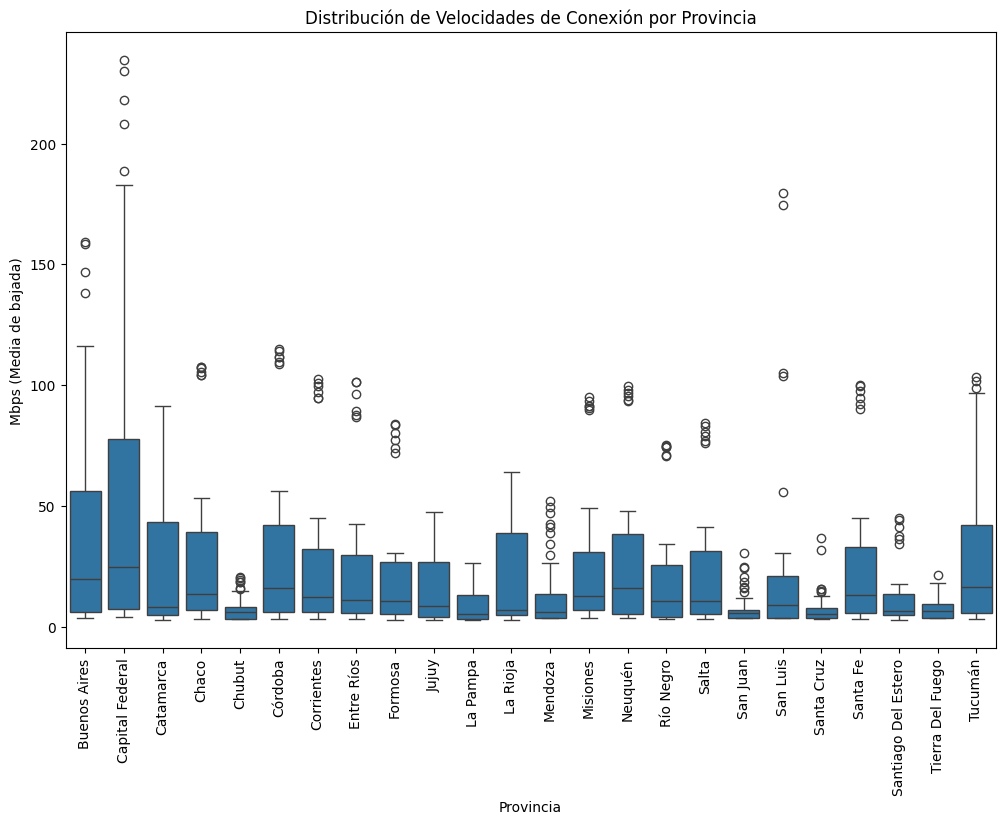

In [18]:
# Distribución de velocidades de conexión por provincia
plt.figure(figsize=(12, 8))
sns.boxplot(x='Provincia', y='Mbps (Media de bajada)', data=internet_prov)
plt.title('Distribución de Velocidades de Conexión por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Mbps (Media de bajada)')
plt.xticks(rotation=90)
plt.show()

La amplia variabilidad en Buenos Aires podría indicar una mezcla de áreas con excelente infraestructura y otras con servicios más deficientes, mientas que las provincias con menor variabilidad podrían tener una infraestructura más uniforme, pero con velocidades más bajas.

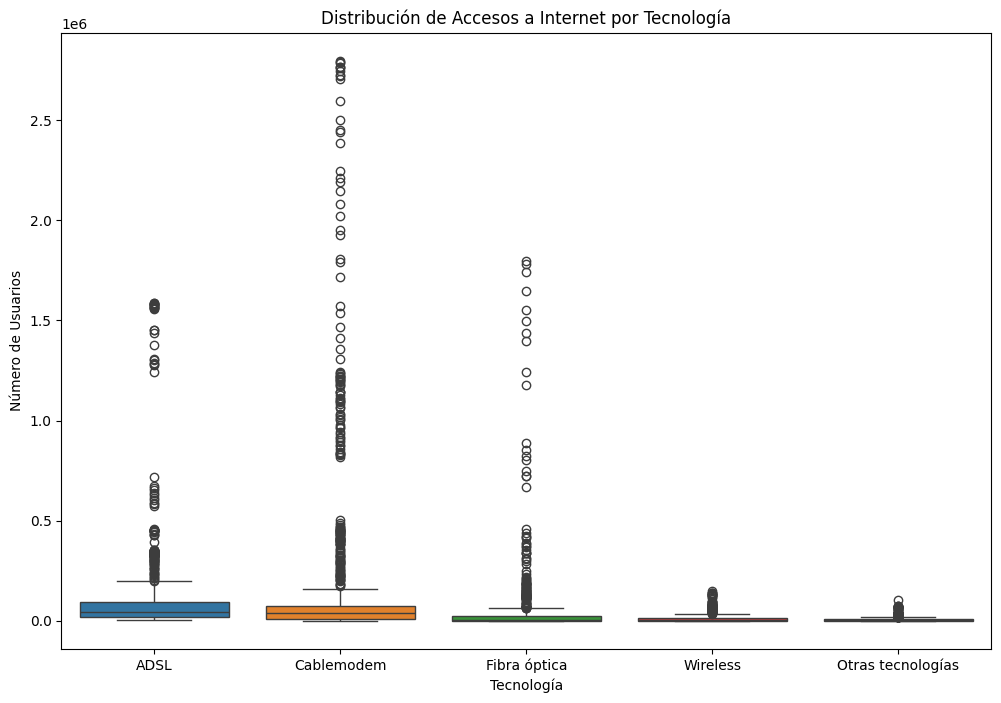

In [19]:
# Distribución de accesos por tecnología
df_describe = internet_prov[col_tecnologias].describe().transpose()

plt.figure(figsize=(12, 8))
sns.boxplot(data=internet_prov[col_tecnologias])
plt.title('Distribución de Accesos a Internet por Tecnología')
plt.xlabel('Tecnología')
plt.ylabel('Número de Usuarios')
plt.show()

Acá analizamos la distribución del número de usuarios de diferentes tecnologías de acceso a internet, en donde vemos varios outliers en todas las tecnologías, especialmente en Fibra óptica y Wireless, lo que indica que hay provincias con un número de usuarios significativamente diferente al resto.
Fibra óptica y Cablemodem son las tecnologías más utilizadas, lo que sugiere una preferencia por estas tecnologías debido a su mayor capacidad y velocidad.


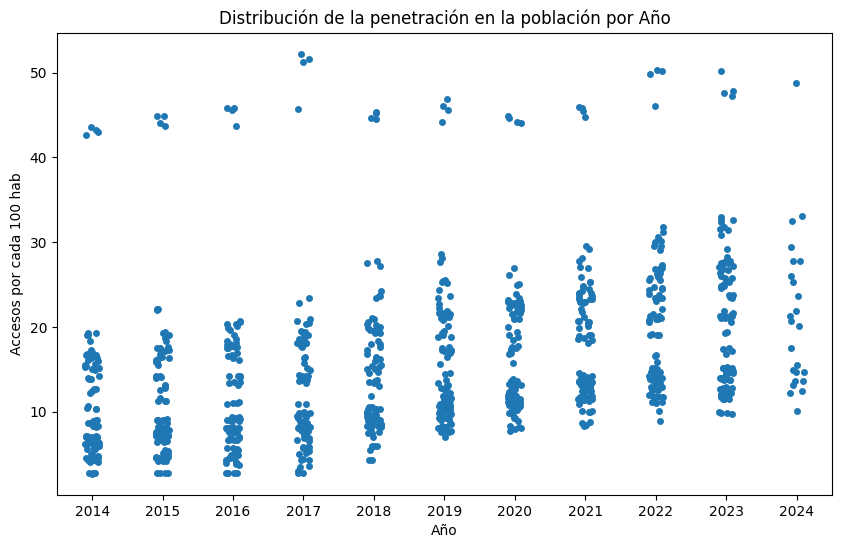

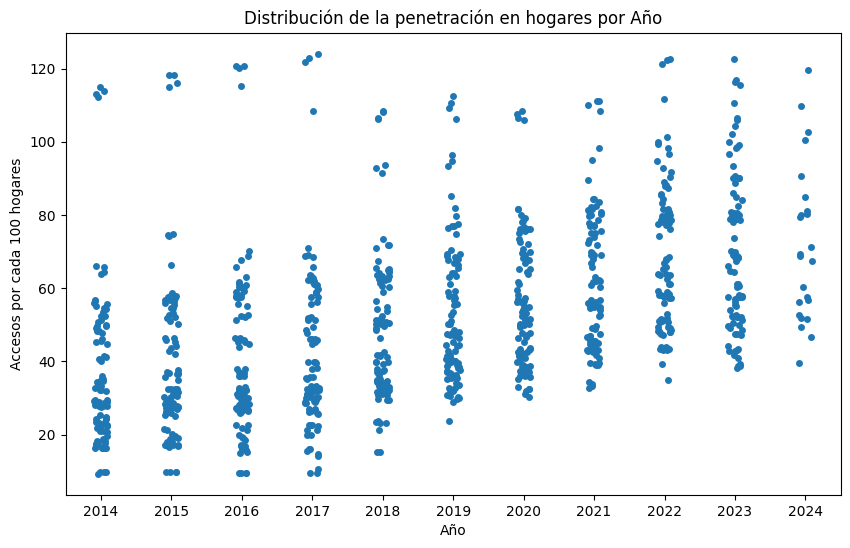

In [20]:
# Gráfico de dispersión para la penetración por población por año 
plt.figure(figsize=(10, 6))
sns.stripplot(x='Año', y='Accesos por cada 100 hab', data=internet_prov, jitter=True)
plt.title('Distribución de la penetración en la población por Año')
plt.show()

# Gráfico de dispersión para la penetración en hogares por año 
plt.figure(figsize=(10, 6))
sns.stripplot(x='Año', y='Accesos por cada 100 hogares', data=internet_prov, jitter=True)
plt.title('Distribución de la penetración en hogares por Año')
plt.show()

Los datos indican que hubo un incremento en la penetracion tanto en hogares como en las persnas a traves de los años, no obstante, la presencia de outliers muestra una gran diferencia entre el impacto de la misma segun las provincias.

#### ANÁLISIS MULTIVARIADO

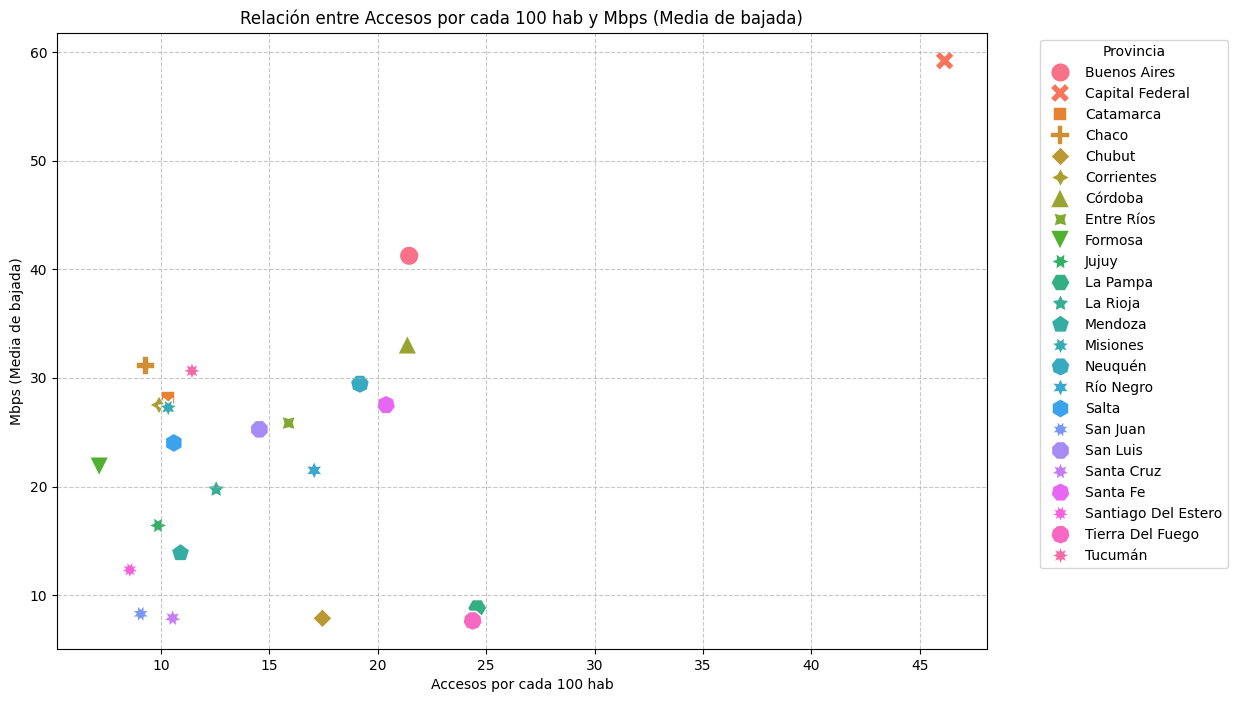

In [21]:
# Realación entre accesos por cada 100 habitantes y media de bajada
df_avg = internet_prov.groupby('Provincia').mean().reset_index() # Saqué un promedio de los valores de todas las columnas de cada provincia

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Accesos por cada 100 hab', y='Mbps (Media de bajada)', hue='Provincia', style='Provincia', s=200, data=df_avg)
plt.title('Relación entre Accesos por cada 100 hab y Mbps (Media de bajada)')
plt.xlabel('Accesos por cada 100 hab')
plt.ylabel('Mbps (Media de bajada)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Las provincias como Buenos Aires y Santa Fe tienen una alta demanda y una alta velocidad: están bien  en términos de infraestructura de internet, lo que les permite manejar una alta demanda con velocidades de conexión adecuadas.
Córdoba y Mendoza tienen alta demanda, pero baja velocidad.Necesitarían mejoras en la infraestructura de internet para satisfacer mejor la alta demanda con velocidades de conexión más rápidas.
San Juan, Tucumán y Santa Cruz tienen baja demanda (baja cantidad de accesos cada 100 hab) y una baja velocidad de conexión. 

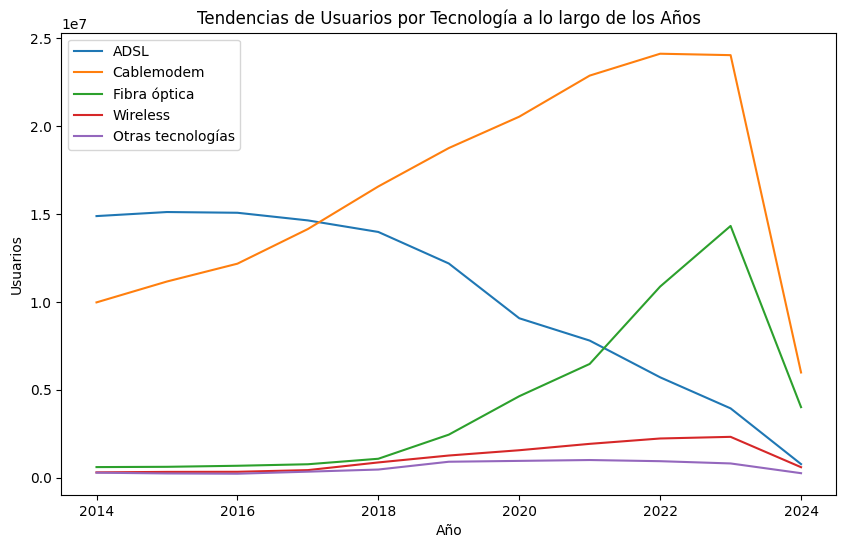

In [22]:
# Tendencias de usuarios por tecnología 
internet_prov.groupby('Año')[col_tecnologias].sum().plot(kind='line', figsize=(10, 6))
plt.title('Tendencias de Usuarios por Tecnología a lo largo de los Años')
plt.xlabel('Año')
plt.ylabel('Usuarios')
plt.show()

La fibra óptica está superando a ADSL en términos de número de usuarios, lo que indica una preferencia por tecnologías más rápidas y eficientes.
Aunque el número de usuarios de ADSL se mantiene relativamente estable, se puede ver una disminución, lo que indica que esta tecnología está siendo gradualmente reemplazada por opciones más avanzadas.
El crecimiento constante en el número de usuarios de cablemodem sugiere que esta tecnología sigue siendo una opción popular para muchos usuarios, posiblemente debido a su disponibilidad y rendimiento.

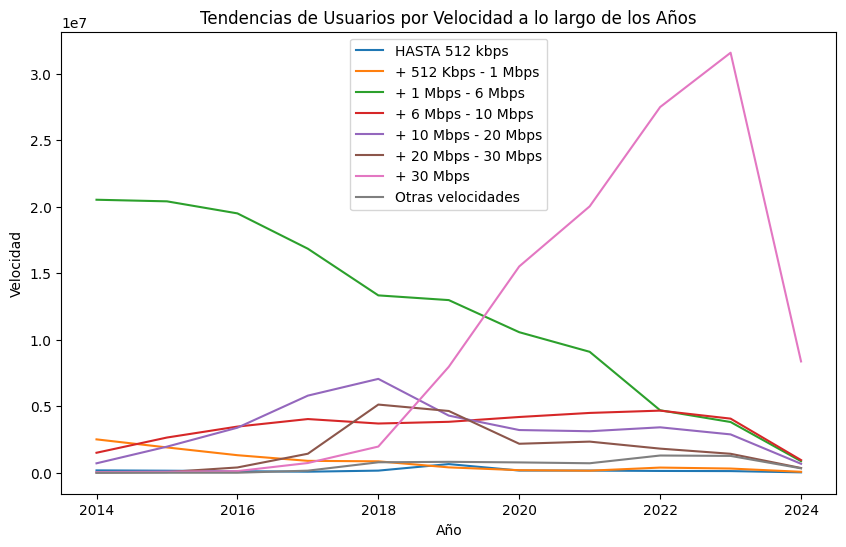

In [23]:
# Tendencias de usuarios por velocidades de conexión
internet_prov.groupby('Año')[col_velocidades].sum().plot(kind='line', figsize=(10, 6))
plt.title('Tendencias de Usuarios por Velocidad a lo largo de los Años')
plt.xlabel('Año')
plt.ylabel('Velocidad')
plt.show()

Hay una clara tendencia hacia el aumento en el número de usuarios con velocidades de conexión más altas, especialmente en los últimos años. Asi como de forma inversa, las velocidades más bajas han disminuído de forma casi constante en el número de usuarios.

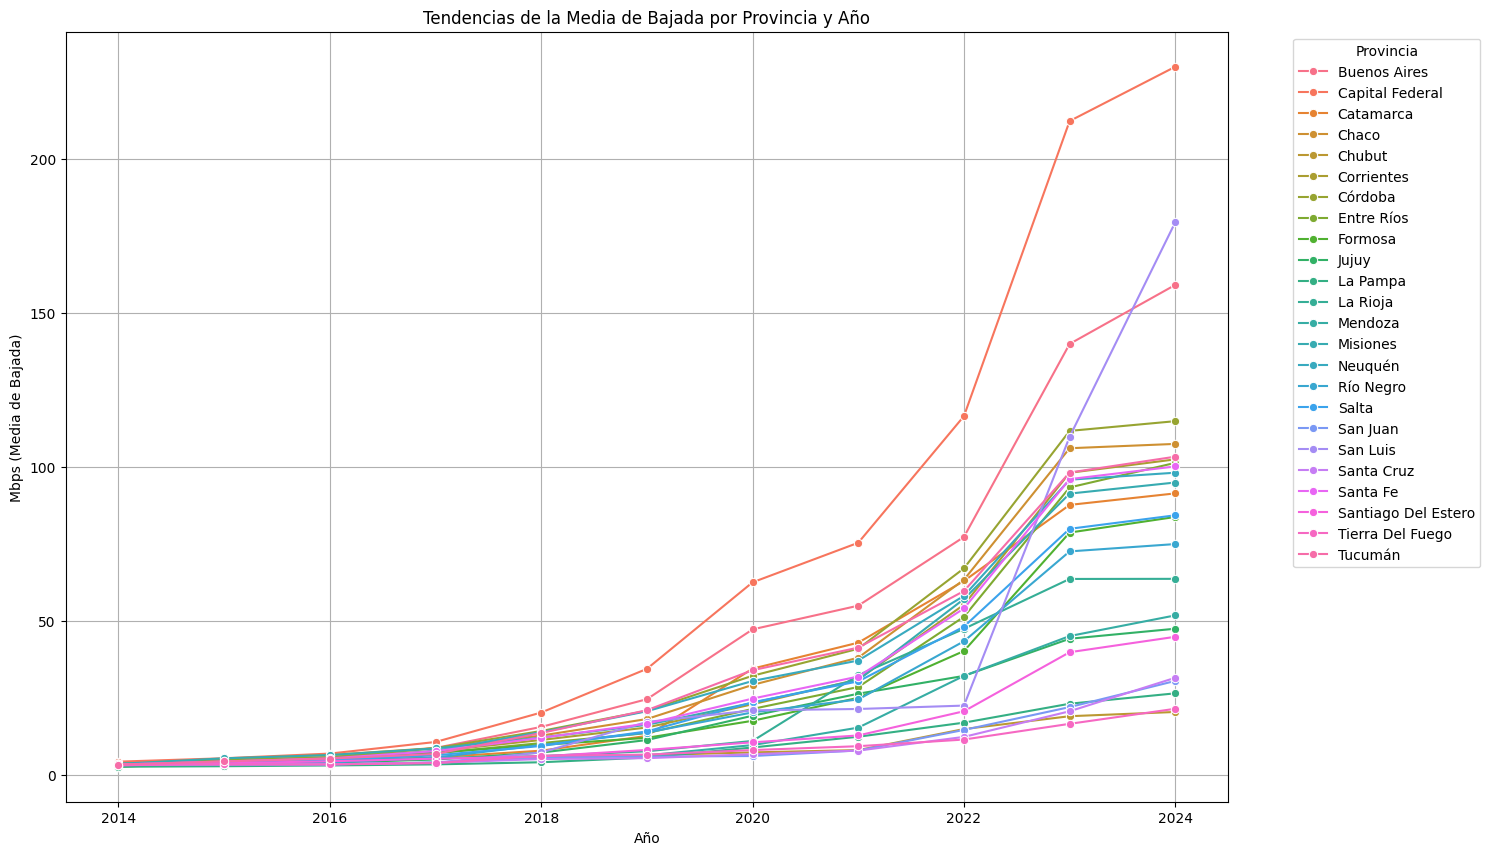

In [24]:
media_bajada_provincia = internet_prov.groupby(['Año', 'Provincia'])['Mbps (Media de bajada)'].mean().reset_index()

plt.figure(figsize=(15, 10))
sns.lineplot(data=media_bajada_provincia, x='Año', y='Mbps (Media de bajada)', hue='Provincia', marker='o')
plt.title('Tendencias de la Media de Bajada por Provincia y Año')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de Bajada)')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Se observa una tendencia general de aumento en la velocidad media de bajada en la mayoría de las provincias, especialmente a partir de 2020 (puede deberse en parte a la pandemia).
Algunas provincias muestran un crecimiento más pronunciado que otras, lo que puede indicar diferencias en la inversión en infraestructura y adopción de tecnologías.

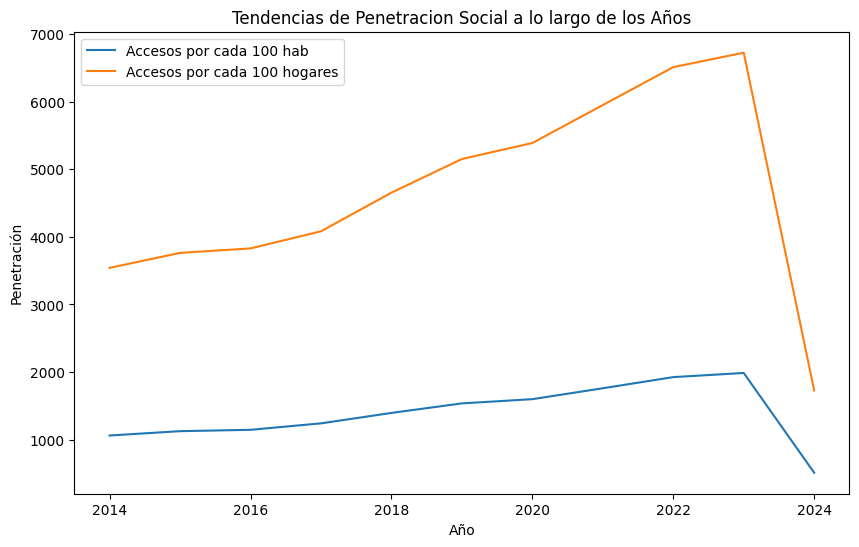

In [25]:
internet_prov.groupby('Año')[col_penetracion_social].sum().plot(kind='line', figsize=(10, 6))
plt.title('Tendencias de Penetracion Social a lo largo de los Años')
plt.xlabel('Año')
plt.ylabel('Penetración')
plt.show()

## ANÁLISIS DATAFRAME : internet_ingresos

In [26]:
# Descargo el archivo de datos 
internet_ingresos = pd.read_parquet(r'Data\ingresos.parquet', engine='auto')

#### INSPECCIÓN INICIAL

In [27]:
internet_ingresos.head(3) # Observo las primeras filas del dataframe

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,1,2.804191e+08,Ene-Mar 2024
1,2023,4,1.673760e+08,Oct-Dic 2023
2,2023,3,1.331066e+08,Jul-Sept 2023


In [28]:
# Información descriptiva del dataset
internet_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        41 non-null     int64  
 1   Trimestre                  41 non-null     int64  
 2   Ingresos (miles de pesos)  41 non-null     float64
 3   Periodo                    41 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


In [29]:
internet_ingresos.columns

Index(['Año', 'Trimestre', 'Ingresos (miles de pesos)', 'Periodo'], dtype='object')

Dispongo de 4 variables seleccionadas con 41 valores cada una sin valores nulos.

Tipos de variables:
- **Cuantitativas** (numéricas): - Discretas: 'Trimestre', 'Año' (int64)
                                - Continuas: 'Ingresos'
- **Cualitativa**: (categórica): La columna 'Periodo'


In [30]:
# Estadísticas descriptivas de las columnas numéricas
internet_ingresos.describe()

,Año,Trimestre,Ingresos (miles de pesos)
count,41.000000,41.000000,4.100000e+01
mean,2018.634146,2.463415,3.885074e+07
std,2.997967,1.142313,5.422892e+07
min,2014.000000,1.000000,2.984054e+06
25%,2016.000000,1.000000,6.912442e+06
50%,2019.000000,2.000000,2.020741e+07
75%,2021.000000,3.000000,4.299994e+07
max,2024.000000,4.000000,2.804191e+08


#### CALIDAD DE LOS DATOS

In [31]:
internet_ingresos.isnull().sum() # Consulto si existen valores faltantes.

Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64

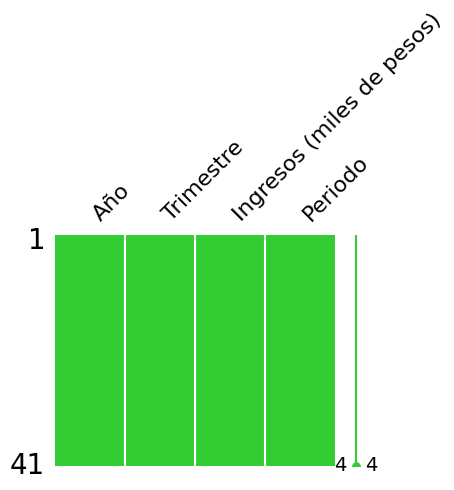

In [32]:
# Visualizo que no existen valores faltantes
msno.matrix(internet_ingresos, color=(0.2, 0.8, 0.2), figsize=(4, 3))
plt.show()

In [33]:
internet_ingresos.duplicated().sum() # Verifico no existan valores duplicados

np.int64(0)

In [34]:
internet_ingresos['Periodo'].describe()

count               41
unique              41
top       Ene-Mar 2024
freq                 1
Name: Periodo, dtype: object

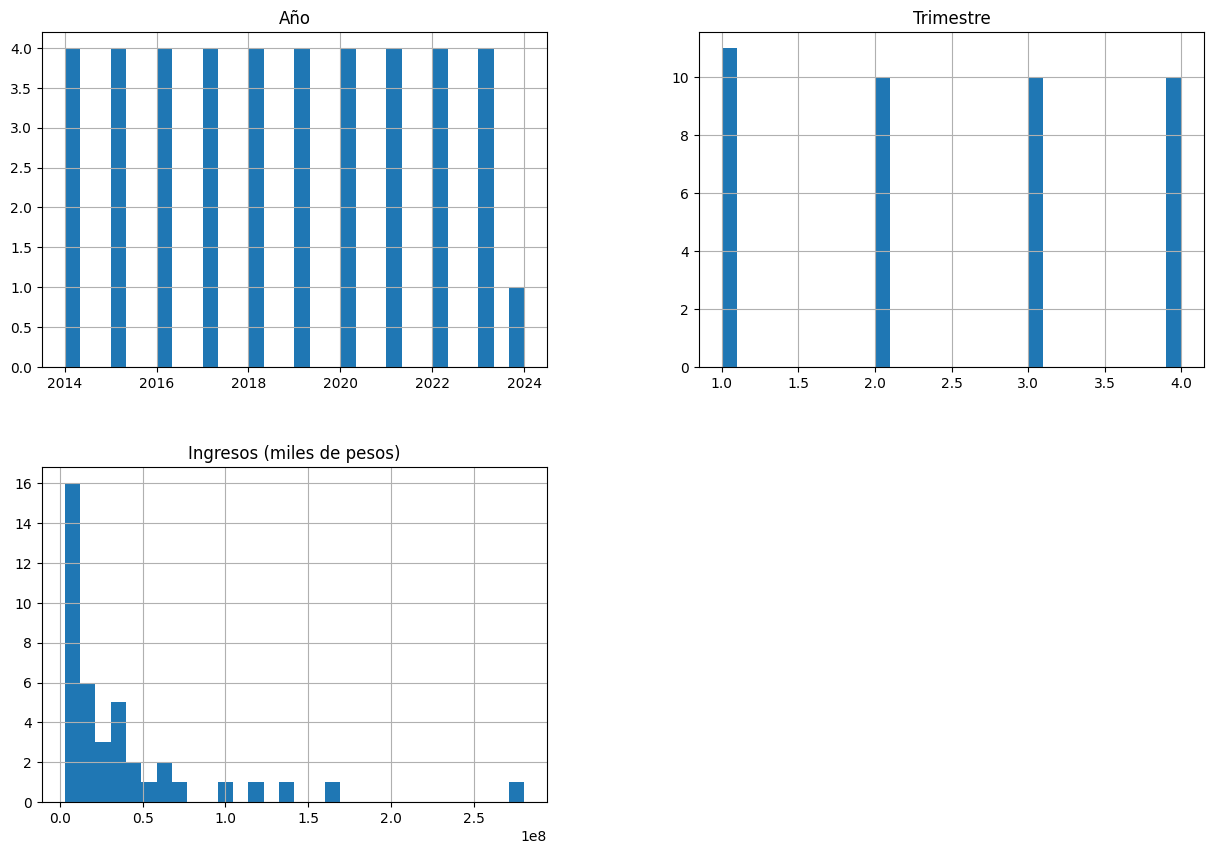

In [35]:
# Histograma de cada variable
internet_ingresos.hist(bins=30, figsize=(15, 10))
plt.show()

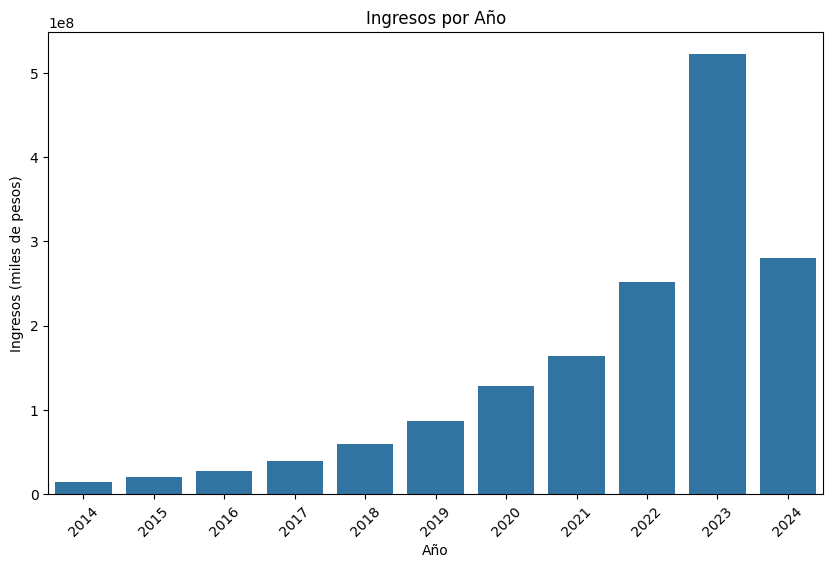

In [36]:
# Agrupo por año y sumao los ingresos
df_agrupado = internet_ingresos.groupby('Año')['Ingresos (miles de pesos)'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Año', y='Ingresos (miles de pesos)', data=df_agrupado)
plt.title('Ingresos por Año')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.xticks(rotation=45)
plt.show()